# Explore here

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
print(df)

       fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    

In [12]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [13]:
df.shape

(3140, 108)

In [10]:
df.info

<bound method DataFrame.info of        fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964

In [16]:
unicos = df.nunique()
unicos

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [18]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139
fips,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
TOT_POP,55601,218022,24881,22400,57840,10138,19680,114277,33615,26032,...,2388,29324,8566,30233,9813,43051,23081,20299,7885,6967
0-9,6787,24757,2732,2456,7095,1198,2351,13141,3869,2554,...,249,3290,947,3444,1157,6104,2384,3121,858,780
0-9 y/o % of total pop,12.206615,11.355276,10.980266,10.964286,12.266598,11.816926,11.946138,11.499252,11.509743,9.811002,...,10.427136,11.219479,11.055335,11.391526,11.790482,14.178532,10.328842,15.375142,10.88142,11.195637
19-Oct,7637,26913,2960,2596,7570,1130,2461,14637,3812,2981,...,217,3478,931,3768,1235,6326,2185,3205,1113,779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,3.1,3.2,4.5,3.3,3.4,4.5,4.3,3.6,4.0,3.9,...,3.7,3.0,3.5,2.9,2.9,2.6,2.4,3.0,3.4,3.4
CKD_Lower 95% CI,2.9,3.0,4.2,3.1,3.2,4.2,4.1,3.3,3.8,3.6,...,3.4,2.8,3.2,2.7,2.7,2.4,2.2,2.8,3.2,3.1
CKD_Upper 95% CI,3.3,3.5,4.8,3.6,3.7,4.8,4.6,3.8,4.2,4.2,...,4.0,3.3,3.8,3.1,3.1,2.8,2.6,3.2,3.7,3.6
CKD_number,1326,5479,887,595,1507,360,662,3204,1068,814,...,72,706,238,687,217,821,447,430,207,185


In [19]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [35]:
print(df.select_dtypes(exclude=[np.number]).columns)


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')


In [36]:
df.drop(columns=['COUNTY_NAME','STATE_NAME'], inplace=True)

In [46]:

print(df.columns)

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=106)


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
print(df.isnull().sum())

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 106, dtype: int64


In [50]:
df.describe()
df.corr()  

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,...,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,...,0.981495,-0.174843,-0.160621,-0.187362,0.989583,-0.218731,-0.202895,-0.230914,0.993889,-0.428608
0-9,-0.049580,0.994010,1.000000,0.085920,0.997487,0.048341,0.989992,0.161984,0.990971,0.304263,...,0.972641,-0.167495,-0.152687,-0.180585,0.984664,-0.216430,-0.200512,-0.229570,0.985337,-0.423641
0-9 y/o % of total pop,-0.010586,0.052507,0.085920,1.000000,0.074714,0.687844,0.056047,0.130136,0.058535,0.342930,...,0.034582,-0.028295,-0.005923,-0.048949,0.047539,-0.133841,-0.117138,-0.153847,0.040384,-0.050916
19-Oct,-0.053130,0.994596,0.997487,0.074714,1.000000,0.056762,0.988552,0.167605,0.987298,0.294682,...,0.973427,-0.178421,-0.163623,-0.191449,0.982778,-0.226956,-0.210885,-0.239865,0.985221,-0.431290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,-0.040631,-0.218731,-0.216430,-0.133841,-0.226956,-0.276999,-0.219593,-0.366835,-0.215739,-0.478115,...,-0.191943,0.918514,0.908023,0.925347,-0.175064,1.000000,0.995203,0.995594,-0.183045,0.471775
CKD_Lower 95% CI,-0.044576,-0.202895,-0.200512,-0.117138,-0.210885,-0.259547,-0.203506,-0.341480,-0.199999,-0.450913,...,-0.176039,0.924630,0.917499,0.928512,-0.159501,0.995203,1.000000,0.989756,-0.167424,0.454327
CKD_Upper 95% CI,-0.033649,-0.230914,-0.229570,-0.153847,-0.239865,-0.296576,-0.232199,-0.393541,-0.228048,-0.506720,...,-0.204368,0.906711,0.892914,0.916610,-0.187528,0.995594,0.989756,1.000000,-0.195052,0.489551
CKD_number,-0.062322,0.993889,0.985337,0.040384,0.985221,0.007654,0.986895,0.149367,0.985851,0.271343,...,0.991025,-0.144575,-0.131191,-0.156493,0.995536,-0.183045,-0.167424,-0.195052,1.000000,-0.416486


In [54]:
X = df[['0-9', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']]
y = df['TOT_POP']

modelo = LinearRegression()
modelo.fit(X, y)

print(modelo.coef_)
print(modelo.intercept_)
print(modelo.score(X, y))

[1.78966054 1.28573858 0.37370058 1.5202413  1.04049073 1.08205104
 1.17544572 0.58045507]
81.85207477919175
0.9999738140789085


Al utilizar todos los rangos de edad cubrimos la poblacion comlpeta lo q nos da un score muy cercano a 1 y hace nuestra prediccion casi exacta.

In [57]:
y_pred = modelo.predict(X)

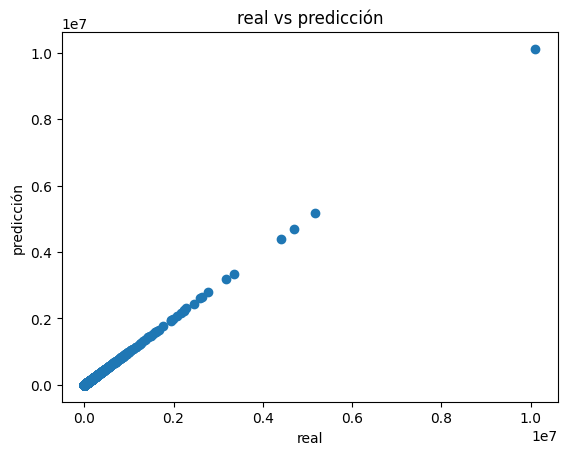

In [61]:
plt.scatter(y, y_pred)
plt.xlabel('real')
plt.ylabel('predicción')
plt.title('real vs predicción')
plt.show()

Los puntos estan alineados muy cerca de la diagnal, lo que nos demuestra que el modelo lo hace muy bien con la poblacion total a partir de los grupos de edad.  

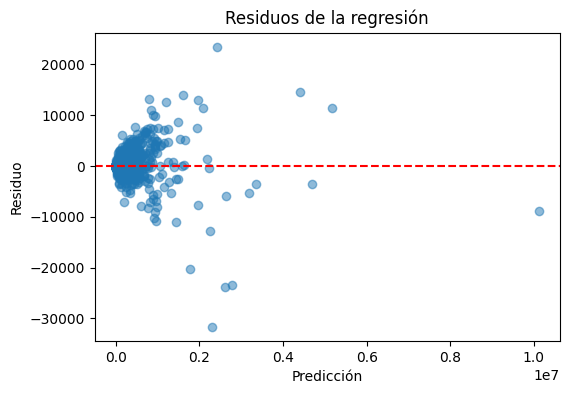

In [63]:
residuos = y - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicción')
plt.ylabel('Residuo')
plt.title('Residuos de la regresión')
plt.show()

Los errores estan muy cerca de cero lo que demuestra que el modelo tiene pocos errores y es bastante preciso.